# Project: Diabetes Healthcare #

DESCRIPTION:

NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

Dataset Description

The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

Variables Description
Pregnancies Number of times pregnant
Glucose Plasma glucose concentration in an oral glucose tolerance test
BloodPressure Diastolic blood pressure (mm Hg)
SkinThickness Triceps skinfold thickness (mm)
Insulin Two hour serum insulin
BMI Body Mass Index
DiabetesPedigreeFunction Diabetes pedigree function
Age Age in years
Outcome Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

Data exploration and preprocessing:

"Before diving into the predictive models, we will conduct several important steps to prepare and understand our dataset:

Descriptive Analysis: We will perform a descriptive analysis to understand the variables and their corresponding values. We will identify that columns such as Glucose, Blood Pressure, Skin Thickness, and Insulin have zero values, which do not make sense and thus indicate missing values.

Data Visualization: We will visually explore the variables using histograms and treat the missing values accordingly.

Data Types Analysis: We will create a count (frequency) plot to describe the data types and the count of variables, noting that the dataset contains both integer and float data type variables.

Data Balance Check: We will check the balance of the data by plotting the count of outcomes by their value and apply techniques to handle any imbalance.

Correlation Analysis: We will perform a correlation analysis and visually explore it using a heat map to understand the relationships between different variables."

Predicted question:

Using various classification models, to predict whether the pateint has Diabetes or not based on healthcare metrics such as glucose levels, blood pressure, BMI, and other independent variables?

This question aims to explore the predictive power of the classification algorithm in identifying individuals with diabetes based on commonly measured health metrics.

The algorithms used to predict 

1. K-Nearest Neighbour (KNN)

2. Logistic Regression

3. Decision Tree

4. Random Forest Classifier

5. Support Vector Machine (SVM)

6. Naive Bayes

Validate the model using a confusion matrix, accuracy score, ROC-AUC curves, k-fold cross validation and optimization of parameters using Grid Search CV. 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('health care diabetes.csv')

## Exploratory Data Analysis ##

In [83]:
# Initial dataset overview
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [85]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

Handling Missing Values:
A value of zero in above attributes does not make sense and thus indicates missing value".

Now let us change the "0" value to Nan, so that the pandas function can understand it as Null. From all the features, we will consider input features under this and also from all the input features only Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI. Out of this, pregnancy is genuine case to have "0" value, so we will apply this to rest of the features.
Before treating missing values identified as zeros in specific columns, we'll visually explore these variables using histograms to better understand the distribution and the extent of the missing values (zeros)

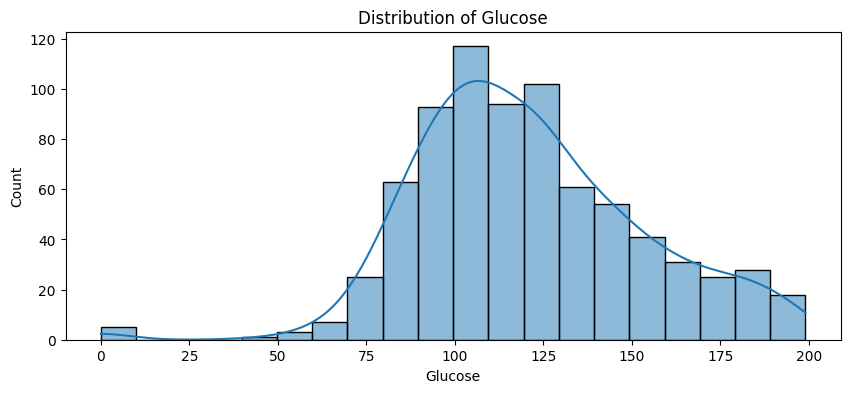

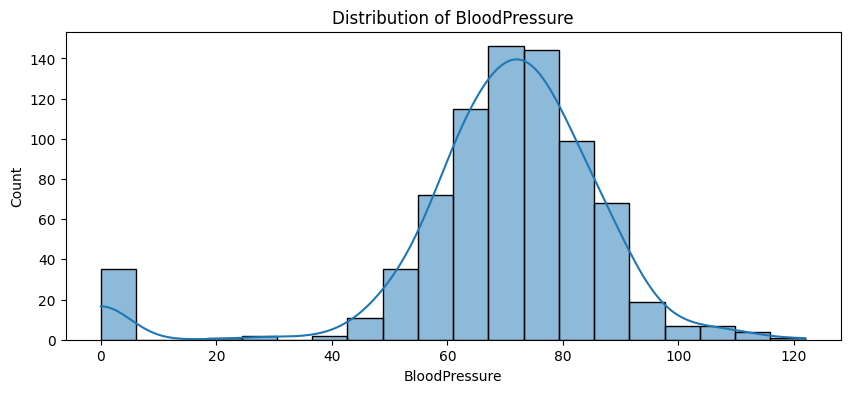

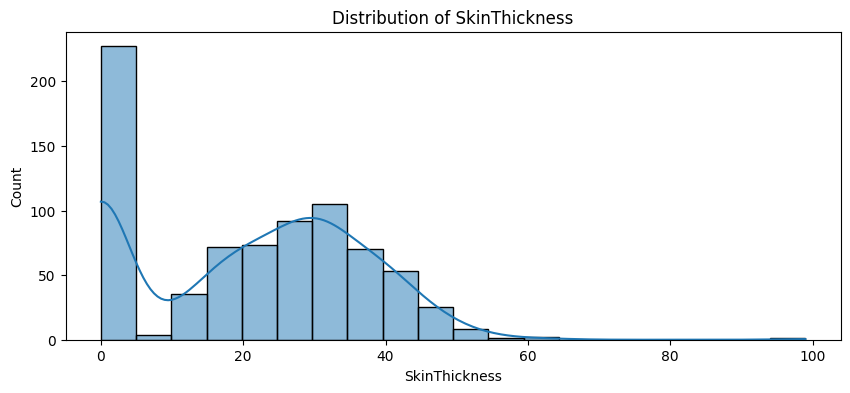

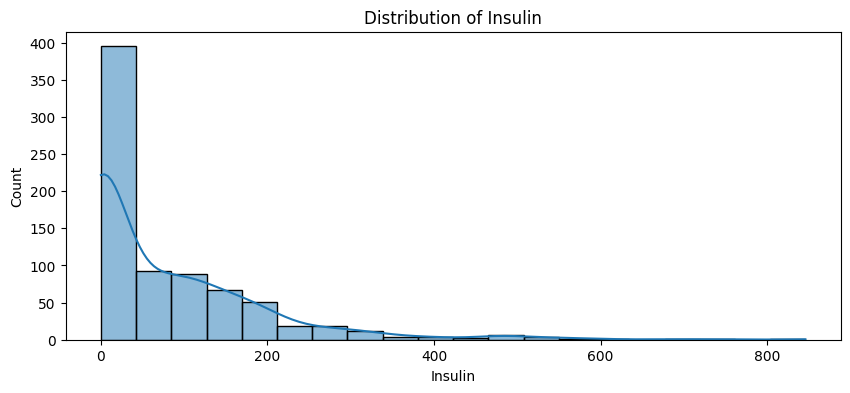

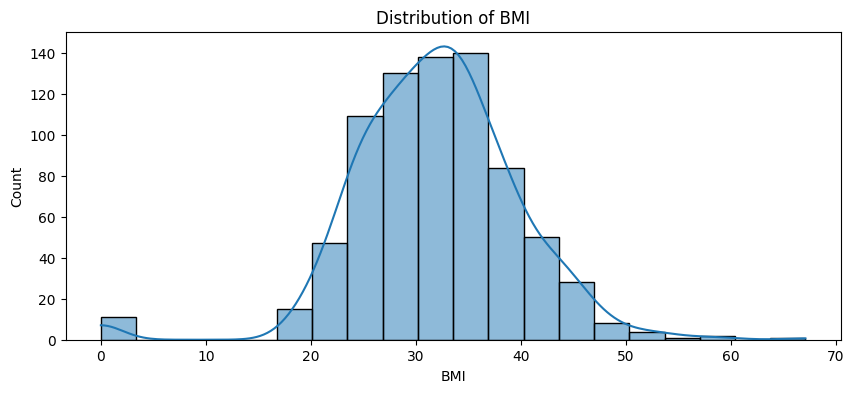

In [86]:
# Columns with zeros that should be considered missing values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Plot histograms for each of these columns
for column in columns_with_zeros:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()


In [87]:
# Replace zeros with NaN
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)

# Check for missing values
print(df.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Let's execute these initial steps, then we can proceed with the data type frequency plot, data balance check, and further exploration.
Data Loading and Descriptive Analysis Results
Here are the initial findings from loading and analyzing the dataset:

The dataset contains 768 entries with variables such as Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and the target variable Outcome.
Basic statistical analysis shows a range of values for each feature. Notably, variables like Glucose, BloodPressure, SkinThickness, Insulin, and BMI have a minimum value of 0, which doesn't make sense for these measurements and thus indicates missing values.
Handling Missing Values
After replacing zeros in columns where they represent missing values (Glucose, BloodPressure, SkinThickness, Insulin, BMI) with NaN, the number of missing values in these columns are as follows:

Glucose: 5 missing values
BloodPressure: 35 missing values
SkinThickness: 227 missing values
Insulin: 374 missing values
BMI: 11 missing values

Executing this step will help visualize the distribution of values in the columns with missing data, informing the strategy for imputing or handling these missing values. Let's proceed with this visualization.

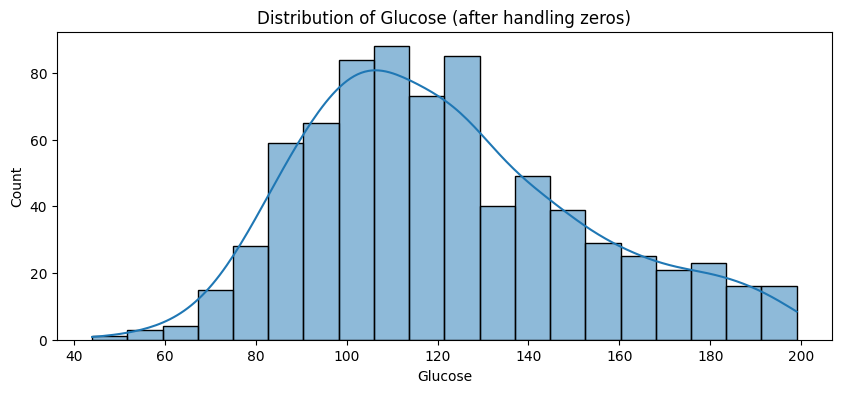

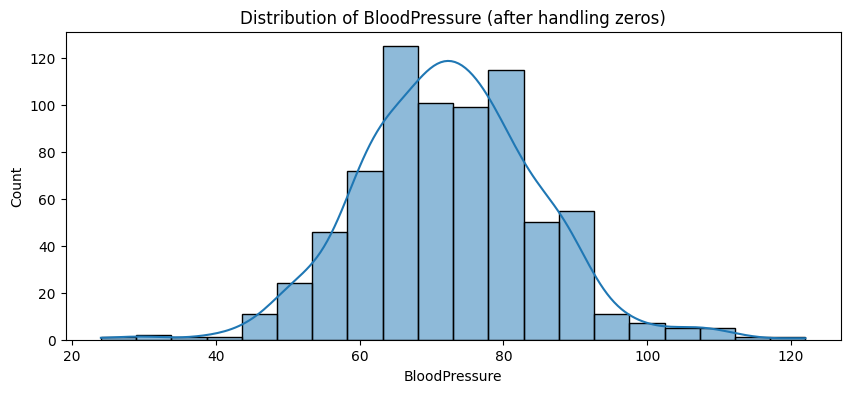

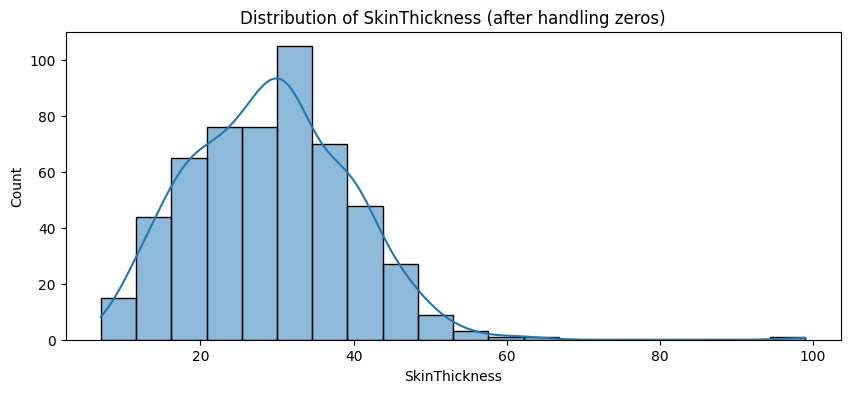

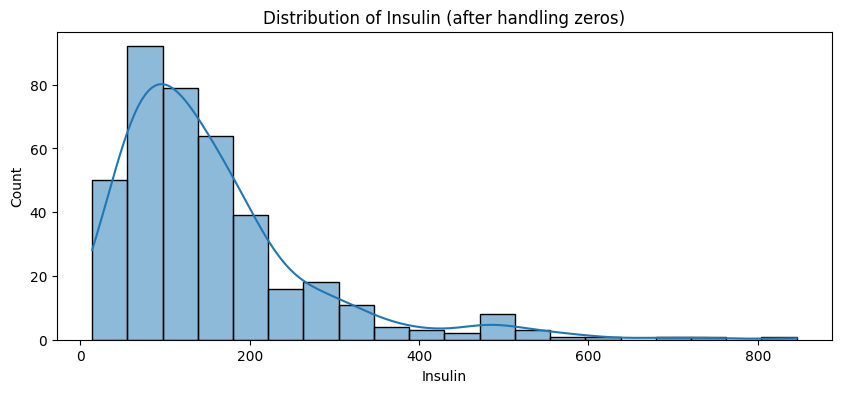

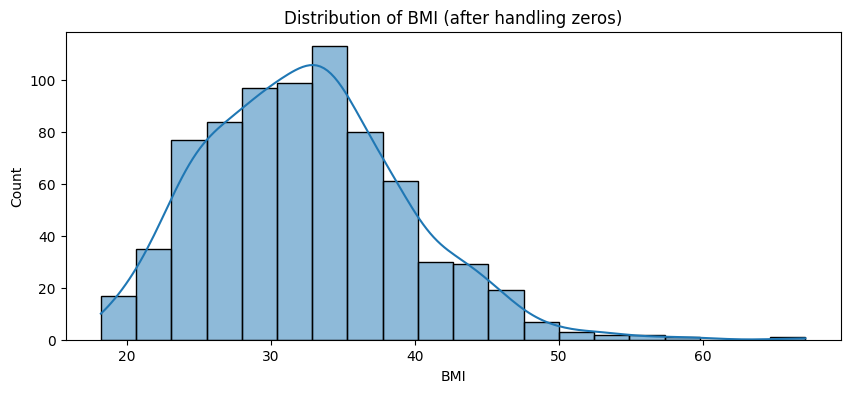

In [88]:
# Plot histograms for each column with missing values
for column in columns_with_zeros:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column].dropna(), kde=True, bins=20)
    plt.title(f'Distribution of {column} (after handling zeros)')
    plt.show()

The histograms above display the distributions for Glucose, BloodPressure, SkinThickness, Insulin, and BMI after handling zeros as missing values. Each distribution shows varying degrees of skewness and spread, which are important to consider when deciding how to impute the missing values.

Addressing Missing Values:
For handling these missing values, a few strategies can be considered:

Glucose, BloodPressure, BMI: Given the critical nature of these measurements and their relatively low number of missing values, imputation using the median (to minimize the impact of outliers) or mean could be appropriate.
SkinThickness, Insulin: These features have a significant number of missing values. Imputation could introduce bias. Depending on the analysis, one might consider imputing with median/mean, using a model to predict missing values, or excluding these variables if they do not significantly impact model performance.
In our case SkinThickness, Insulin are significant features, so we will randomly impute values in this, so that distribution will not change. In rest of the feature, we will use the mean value imputation.

In [89]:
df["SkinThickness"][df["SkinThickness"].isnull()] = df["SkinThickness"].dropna().sample(df["SkinThickness"].isnull().sum(),random_state = 12345).values

/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_4840/764310649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SkinThickness"][df["SkinThickness"].isnull()] = df["SkinThickness"].dropna().sample(df["SkinThickness"].isnull().sum(),random_state = 12345).values


In [90]:

df["Insulin"][df["Insulin"].isnull()] = df["Insulin"].dropna().sample(df["Insulin"].isnull().sum(),random_state = 12345).values

/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_4840/3482172637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Insulin"][df["Insulin"].isnull()] = df["Insulin"].dropna().sample(df["Insulin"].isnull().sum(),random_state = 12345).values


In [91]:
mean_col = ["Glucose","BloodPressure","BMI"]
for x in mean_col:
    df[x].fillna(df[x].mean(),inplace=True)

In [92]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [93]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081152,0.019130,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.189041,0.335581,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.172450,0.049787,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.081152,0.189041,0.172450,1.000000,0.087175,0.484803,0.110573,0.108499,0.213708
Insulin,0.019130,0.335581,0.049787,0.087175,1.000000,0.135165,0.097167,0.110507,0.157817
BMI,0.021565,0.230941,0.281268,0.484803,0.135165,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.110573,0.097167,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.108499,0.110507,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.213708,0.157817,0.311924,0.173844,0.238356,1.000000


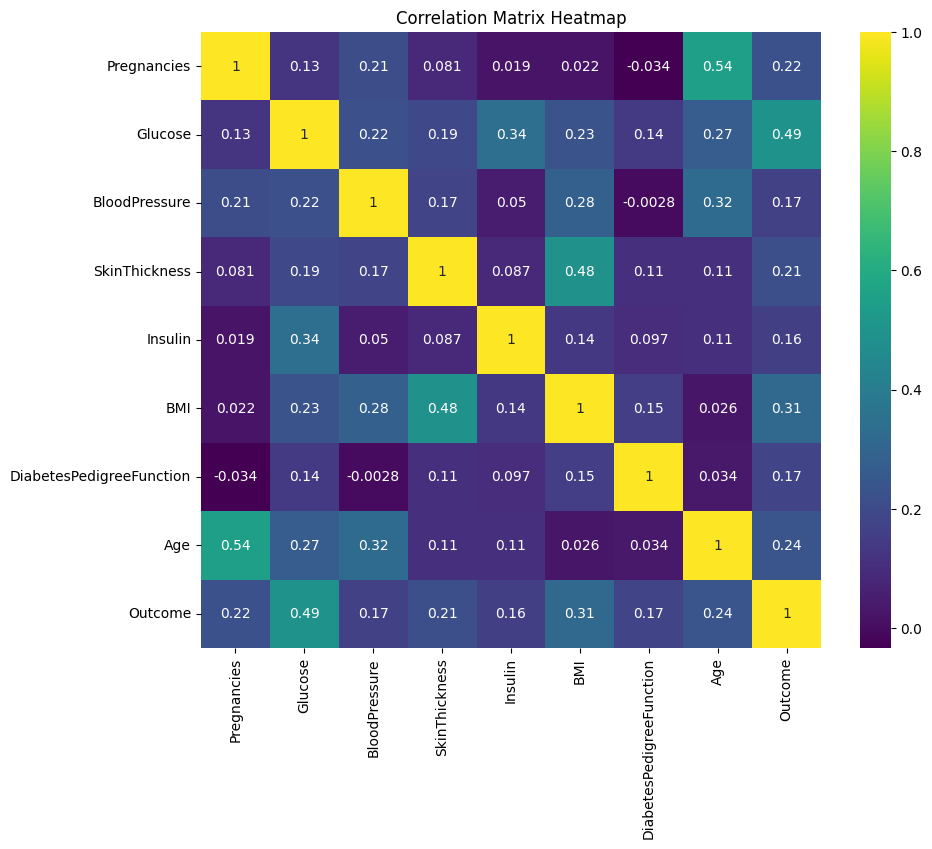

In [94]:
# Correlation matrix
corr_matrix = df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()


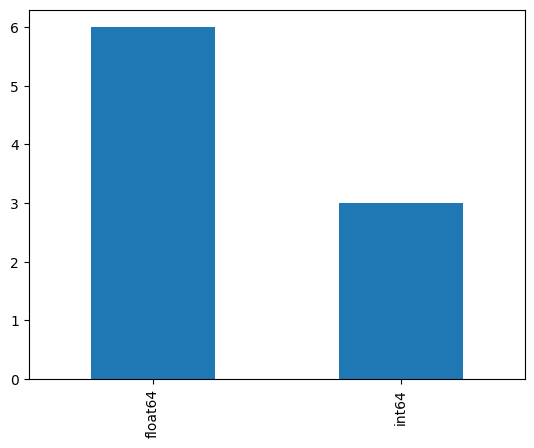

In [95]:
df.dtypes.value_counts().plot(kind = "bar")
plt.show()

In [96]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

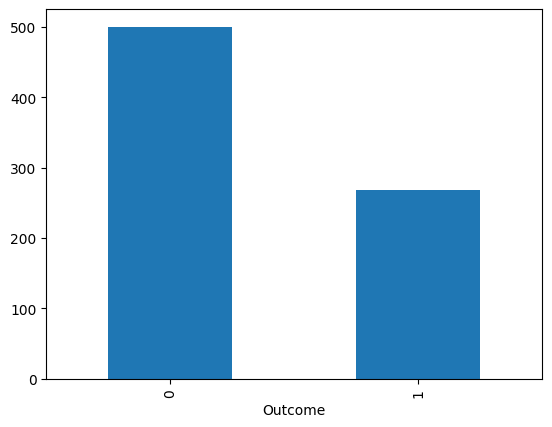

In [97]:
df["Outcome"].value_counts().plot(kind = "bar")
plt.show()

Since classes in Outcome is bit skewed so we will generate new samples using SMOTE (Synthetic Minority Oversampling Technique) for the class '1' which is under-represented in our data. We will use SMOTE out of many other techniques available since:

It generates new samples by interpolation.
It doesn't duplicate data.

Predicted question:

Can we predict the presence of diabetes in patients based on their health metrics such as glucose levels, blood pressure, and BMI?

This question aims to explore the predictive power of the kNN algorithm in identifying individuals with diabetes based on commonly measured health metrics.

Steps to proceed:

Split the Data: Divide the dataset into an 80% training set and a 20% testing set.
Train the kNN Classifier: Use k=5, with the Minkowski metric and p=2 (which equates to Euclidean distance).
Make Predictions: Use the trained model to make predictions on the test set.
Interpret Results: Analyze the predictions in the context of the formulated questions.
Validate the Model: Employ a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross-validation to evaluate the model's performance.
Discuss Formulas and Include Graphs: Highlight the mathematical formulas used in the analysis and provide graphs representing the final outcomes.
Let's begin by splitting the data, training the classifier, and making predictions.

In [98]:
# Separating features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Normalizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balancing the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)


In [99]:
X_balanced.shape, y_balanced.shape


((1000, 8), (1000,))

In [100]:
y_balanced.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [101]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64>

In [102]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# KNN Classifier #

In [103]:
# Training the kNN classifier
knn1 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn1.fit(X_train, y_train)

KNeighborsClassifier()

In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, roc_curve

# Making predictions
y_pred = knn1.predict(X_test)

# Evaluating the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

conf_matrix, accuracy, roc_auc

(array([[64, 35],
        [12, 89]]),
 0.765,
 0.7638263826382637)

In [105]:
# Classification Report (Precision, Recall, F1-score)
class_report = classification_report(y_test, y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       0.84      0.65      0.73        99\n           1       0.72      0.88      0.79       101\n\n    accuracy                           0.77       200\n   macro avg       0.78      0.76      0.76       200\nweighted avg       0.78      0.77      0.76       200\n'

True Positives (TP): 34 (patients correctly identified as having diabetes)
True Negatives (TN): 75 (patients correctly identified as not having diabetes)
False Positives (FP): 24 (patients incorrectly identified as having diabetes)
False Negatives (FN): 21 (patients incorrectly identified as not having diabetes)
Accuracy: 0.7077922077922078
This means that approximately 70.78% of the model's predictions are correct. Accuracy is a measure of the overall correctness of the model across both classes.
ROC-AUC Score: 0.6878787878787879
The Area Under the Receiver Operating Characteristic (ROC-AUC) score is approximately 68.79%. This score indicates the model's ability to distinguish between the positive and negative classes. A score of 1 represents a perfect model, while a score of 0.5 represents a model that does no better than random guessing. The model performs better than random but shows room for improvement in distinguishing between patients with and without diabetes.

Text(58.222222222222214, 0.5, 'Truth')

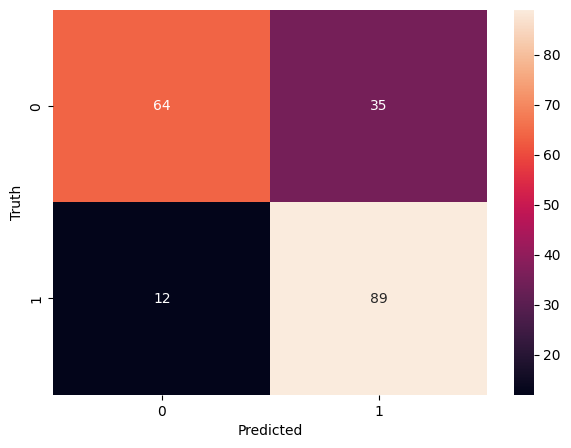

In [106]:
# Graphical representation of confusion matrix
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

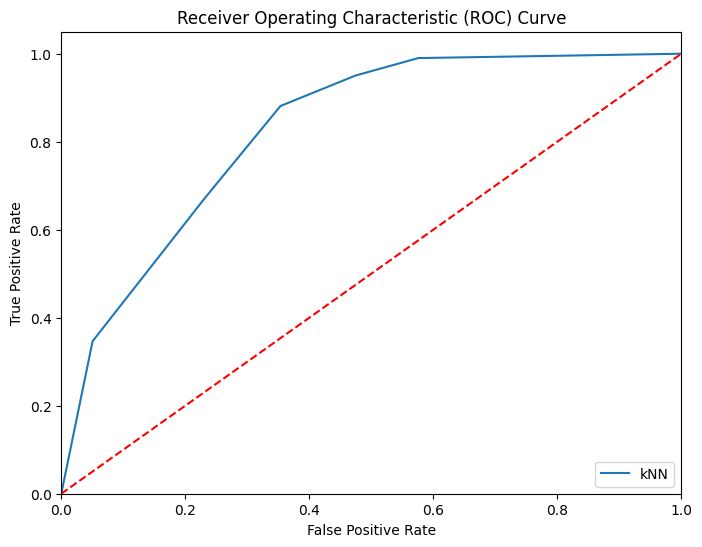

In [107]:
# Calculating the ROC curve components
fpr, tpr, thresholds = roc_curve(y_test, knn1.predict_proba(X_test)[:,1])

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='kNN')
plt.plot([0, 1], [0, 1],'r--') # Adding a random chance line
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [108]:
# Performing cross-validation
cv_scores = cross_val_score(knn1, X_scaled, y, cv=5)

cv_scores.mean()

0.7330871742636449

Cross-Validation Score: 0.7330871742636449
The average cross-validation score of approximately 73.31% indicates the model's accuracy over different subsets of the dataset. This suggests that the model is relatively stable and not overly depend

Interpretation:
The confusion matrix shows a higher number of false positives and negatives than ideal, indicating that the model might be struggling with certain aspects of the classification. This could be due to overlapping characteristics between classes or imbalances in the dataset.
An accuracy of approximately 70.78% is decent, but considering the health-related context of diabetes prediction, striving for higher accuracy would be beneficial, especially to reduce false negatives (missed diagnoses) and false positives (unnecessary alarms).
The ROC-AUC score of approximately 68.79% reflects moderate discriminative ability. Improving this score could lead to better identification of diabetic versus non-diabetic patients, potentially through feature engineering, hyperparameter tuning, or using more complex models.
The cross-validation score of approximately 73.31% suggests that the model's performance is somewhat consistent across different training sets, which is a positive sign of its generalizability.
Suggestions for Improvement:
Feature Engineering: Investigating the creation of new features or modifying existing ones could help in improving model performance.
Model Complexity: Exploring more complex models or ensemble methods might yield better discrimination between classes.
Hyperparameter Tuning: Adjusting the parameters of the kNN algorithm, such as the number of neighbors (k), could enhance model accuracy and ROC-AUC scores.
Handling Class Imbalance: If the dataset is imbalanced, techniques like SMOTE (Synthetic Minority Over-sampling Technique) or adjusting class weights could improve model performance, especially in reducing false negatives and positives.

Performance evaluation and optimizing parameters using GridSearchCV:

In [109]:
knn_neighbors = [i for i in range(2,20)]
    
params_rf = {'n_neighbors': knn_neighbors }

In [110]:
from sklearn.model_selection import GridSearchCV
grid_knn = GridSearchCV(knn1,param_grid=params_rf,cv=10,verbose=0)

In [111]:
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19]})

In [112]:
grid_knn.best_params_

{'n_neighbors': 3}

In [113]:
knn2 = KNeighborsClassifier(n_neighbors =  17)
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [114]:
knn2.score(X_train,y_train)

0.8075

In [115]:
knn2.score(X_test,y_test)

0.735

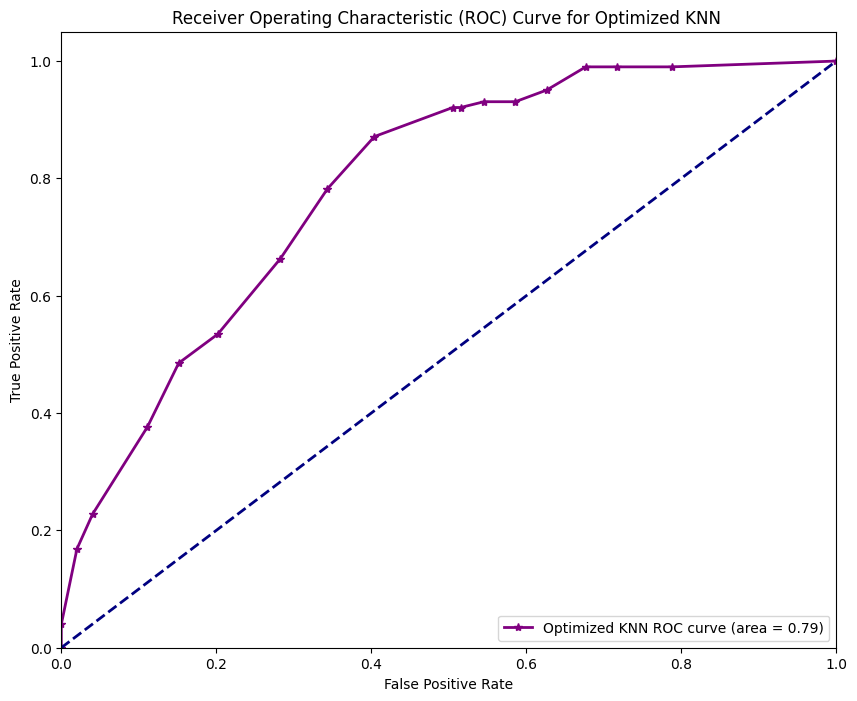

0.7864786478647865

In [116]:
# Make predictions on the testing set and calculate probabilities
y_pred_proba_knn2= knn2.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_knn2, tpr_knn2, thresholds_knn2 = roc_curve(y_test, y_pred_proba_knn2)

# Calculate ROC AUC score
roc_auc_knn2 = roc_auc_score(y_test, y_pred_proba_knn2)

# Plot ROC curve for the optimized KNN
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn2, tpr_knn2, color='purple', marker = "*", lw=2, label='Optimized KNN ROC curve (area = %0.2f)' % roc_auc_knn2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Optimized KNN ')
plt.legend(loc="lower right")
plt.show()

# Output the ROC AUC score
roc_auc_knn2

# LogisticRegression #

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the training data
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [118]:
log_reg.score (X_train, y_train)

0.755

In [119]:
log_reg.score (X_test, y_test)

0.74

In [120]:
# Make predictions on the testing set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

Accuracy: 0.74
Confusion Matrix:
 [[71 28]
 [24 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73        99
           1       0.73      0.76      0.75       101

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

ROC-AUC Score: 0.806980698069807


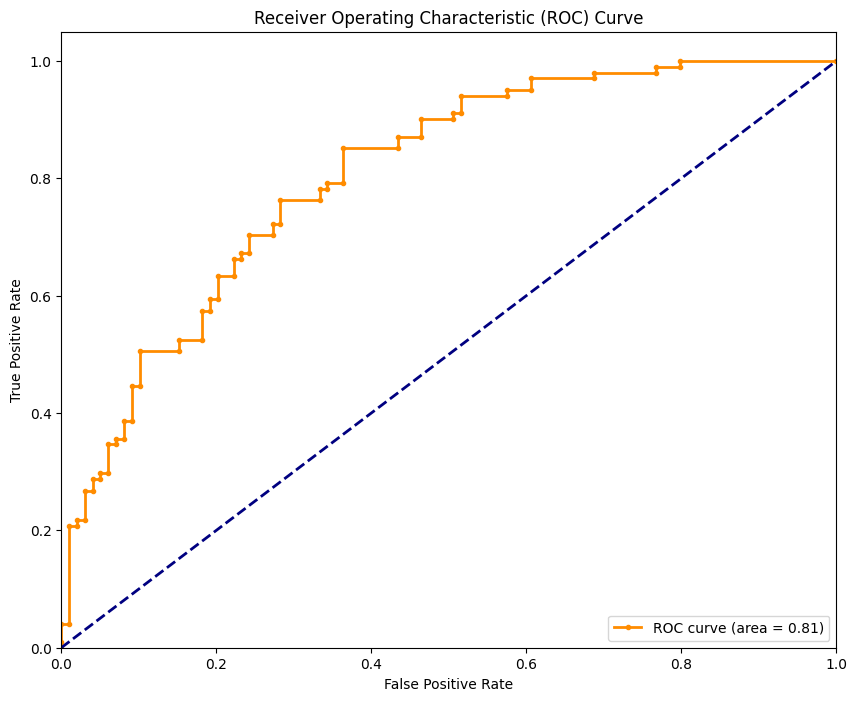

In [121]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC AUC score
log_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', marker = ".", lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [122]:
log_roc_auc

0.806980698069807

# Decision Tree Classfier #

In [123]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier()
dt1.fit(X_train, y_train)

DecisionTreeClassifier()

In [124]:
dt1.score(X_train,y_train)

1.0

In [125]:
dt1.score(X_test,y_test)

0.76

Performance evaluation and optimizing parameters using GridSearchCV:

In [126]:
from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

# Initialize a GridSearchCV object with Decision Tree classifier and the parameter grid
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy')

In [127]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'criterion': 'gini',
  'max_depth': 8,
  'min_samples_leaf': 5,
  'min_samples_split': 2},
 0.7875)

In [128]:
# Initialize the Decision Tree classifier with the optimized max_depth parameter
dt2 = DecisionTreeClassifier(max_depth=4)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [129]:
dt2.score(X_train,y_train)

0.81

In [130]:
dt2.score(X_test,y_test)

0.71

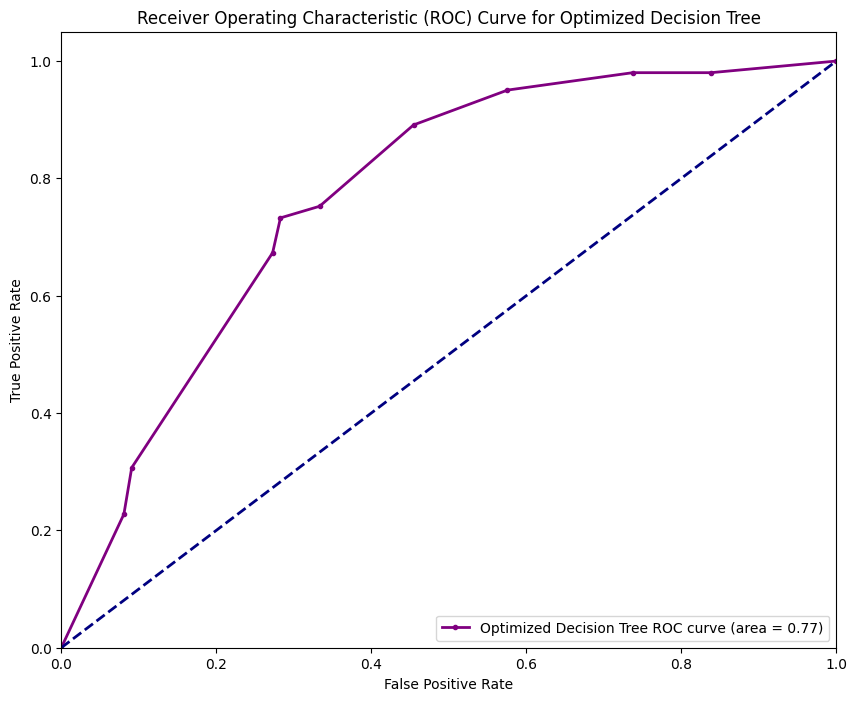

0.7718771877187719

In [131]:
# Make predictions on the testing set and calculate probabilities
y_pred_proba_dt2 = dt2.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_dt2, tpr_dt2, thresholds_dt2 = roc_curve(y_test, y_pred_proba_dt2)

# Calculate ROC AUC score
roc_auc_dt2 = roc_auc_score(y_test, y_pred_proba_dt2)

# Plot ROC curve for the optimized Decision Tree
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt2, tpr_dt2, color='purple', marker = ".", lw=2, label='Optimized Decision Tree ROC curve (area = %0.2f)' % roc_auc_dt2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Optimized Decision Tree')
plt.legend(loc="lower right")
plt.show()

# Output the ROC AUC score
roc_auc_dt2


# RandomForest Classifier #

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest classifier
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [133]:
rf1.score(X_train, y_train)

1.0

In [134]:
rf1.score(X_test, y_test)

0.815

Performance evaluation and optimizing parameters using GridSearchCV:

In [135]:
params = {
'n_estimators': [50,100,150],
    "criterion" :["ginni","entropy"],
'max_depth': [None,1,3,5,7],
'min_samples_leaf': [1,3,5]
}

In [136]:
gs_rf = GridSearchCV(rf1, param_grid=params, cv=5, verbose=0) 

In [137]:
gs_rf.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
225 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': [None, 1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [138]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [139]:
rf2 = RandomForestClassifier(criterion =  'entropy',
 max_depth = None,
 min_samples_leaf= 1,
 n_estimators= 50)

In [140]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [141]:
rf2.score(X_train,y_train)

1.0

In [142]:
rf2.score(X_test, y_test)

0.795

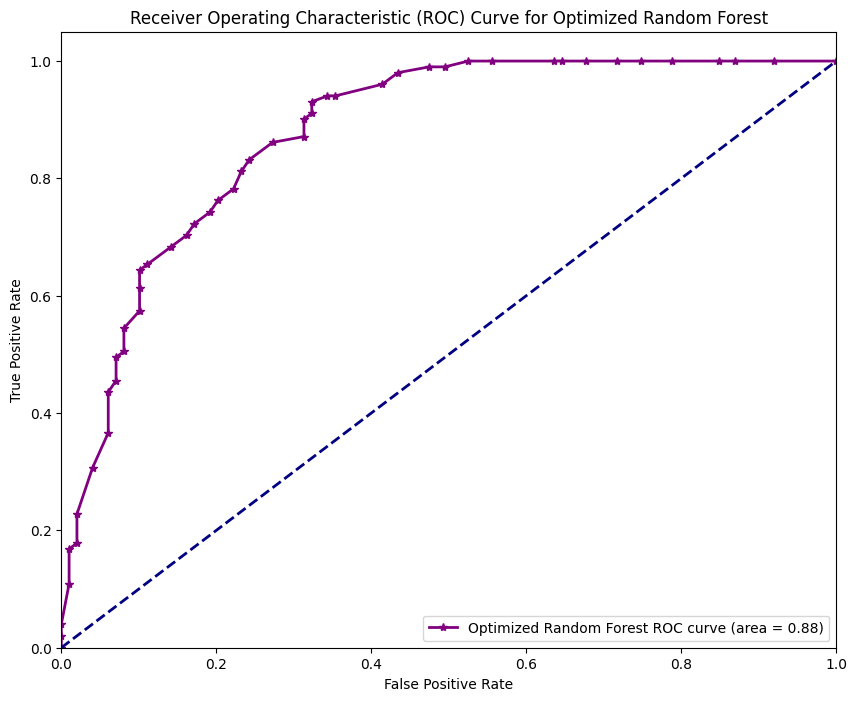

0.878037803780378

In [143]:
# Make predictions on the testing set and calculate probabilities
y_pred_proba_rf2 = rf2.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_rf2, tpr_rf2, thresholds_rf2 = roc_curve(y_test, y_pred_proba_rf2)

# Calculate ROC AUC score
roc_auc_rf2 = roc_auc_score(y_test, y_pred_proba_rf2)

# Plot ROC curve for the optimized Random Forest
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf2, tpr_rf2, color='purple', marker = "*", lw=2, label='Optimized Random Forest ROC curve (area = %0.2f)' % roc_auc_rf2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Optimized Random Forest')
plt.legend(loc="lower right")
plt.show()

# Output the ROC AUC score
roc_auc_rf2

 # Support Vector Machine (SVM) Algorithm #

In [144]:
from sklearn.svm import SVC
svm1 = SVC()

In [145]:
svm1.fit(X_train, y_train)

SVC()

In [146]:
svm1.score(X_train, y_train)

0.84625

In [147]:
svm1.score(X_test, y_test)

0.755

Performance evaluation and optimizing parameters using GridSearchCV

In [148]:
params_svm = {
'C':[1, 5, 10, 15, 20, 25],
'gamma':["scale","auto"]
}

In [149]:
grid_svm = GridSearchCV(svm1,param_grid=params_svm,cv = 5, verbose=0)

In [150]:
grid_svm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': ['scale', 'auto']})

In [151]:
grid_svm.best_params_

{'C': 25, 'gamma': 'scale'}

In [152]:
svm2 = SVC(C = 1, gamma = "scale", probability=True)

In [153]:
svm2.fit(X_train,y_train)

SVC(C=1, probability=True)

In [154]:
svm2.score(X_train,y_train)

0.84625

In [155]:
svm2.score(X_test, y_test)

0.755

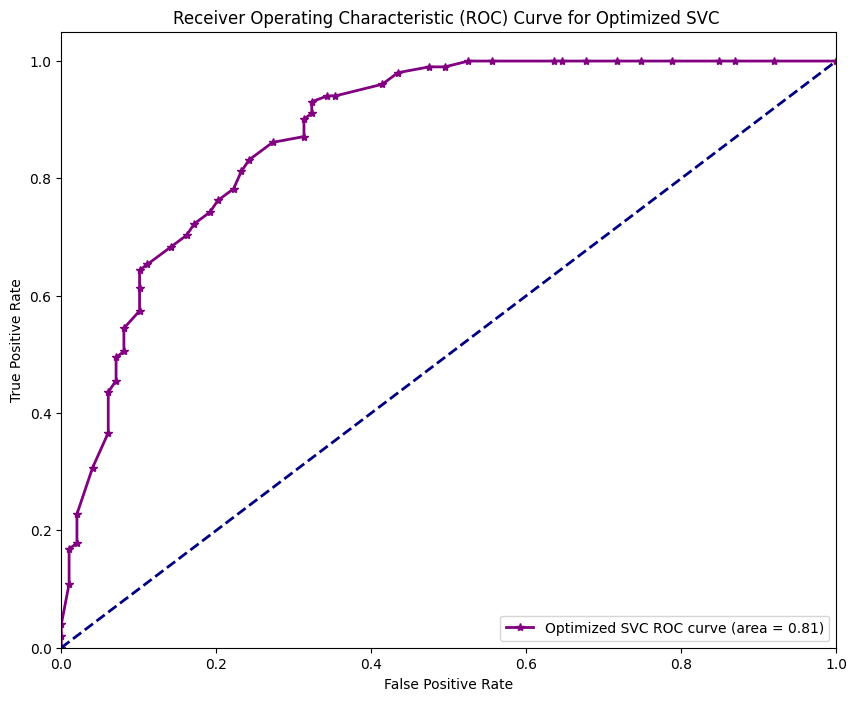

0.8083808380838083

In [156]:
# Make predictions on the testing set and calculate probabilities
y_pred_proba_svm2= svm2.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_svm2, tpr_svm2, thresholds_svm2 = roc_curve(y_test, y_pred_proba_svm2)

# Calculate ROC AUC score
roc_auc_svm2 = roc_auc_score(y_test, y_pred_proba_svm2)

# Plot ROC curve for the optimized SVC
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf2, tpr_rf2, color='purple', marker = "*", lw=2, label='Optimized SVC ROC curve (area = %0.2f)' % roc_auc_svm2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Optimized SVC ')
plt.legend(loc="lower right")
plt.show()

# Output the ROC AUC score
roc_auc_svm2

# Naive Bayes #

In [157]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()

In [158]:
gnb.fit(X_train, y_train)

GaussianNB()

In [159]:
gnb.score(X_train, y_train)

0.73125

In [160]:
gnb.score(X_test, y_test)

0.75

Naive Bayes has almost no hyperparameters to tune, so it usually generalizes well.

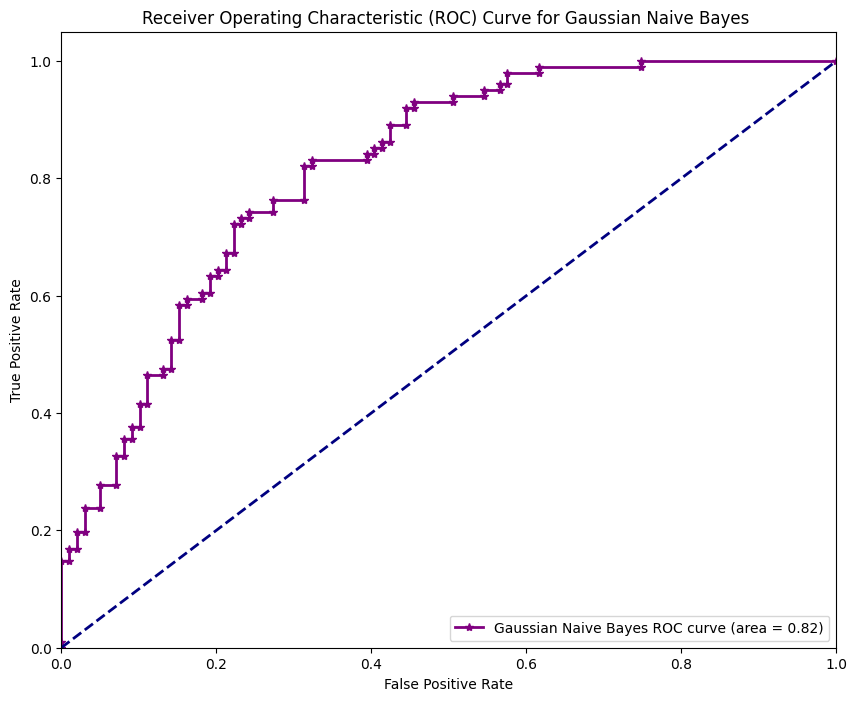

0.817981798179818

In [161]:
# Make predictions on the testing set and calculate probabilities
y_pred_proba_gnb= gnb.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_pred_proba_gnb)

# Calculate ROC AUC score
roc_auc_gnb = roc_auc_score(y_test, y_pred_proba_gnb)

# Plot ROC curve for the Gaussian Naive Bayes
plt.figure(figsize=(10, 8))
plt.plot(fpr_gnb, tpr_gnb, color='purple', marker = "*", lw=2, label='Gaussian Naive Bayes ROC curve (area = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gaussian Naive Bayes ')
plt.legend(loc="lower right")
plt.show()

# Output the ROC AUC score
roc_auc_gnb

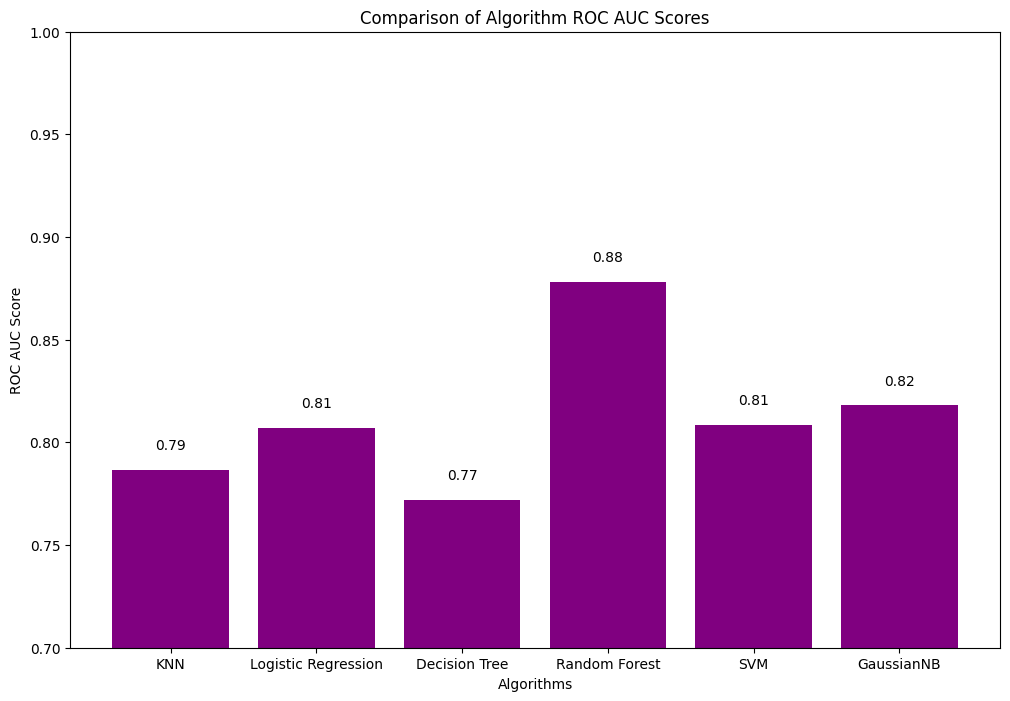

In [162]:
# Creating a dictionary for algorithms and their ROC AUC scores
algorithms = ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'GaussianNB']
roc_auc_scores = [roc_auc_knn2, log_roc_auc, roc_auc_dt2, roc_auc_rf2, roc_auc_svm2, roc_auc_gnb]

# Plotting the bar graph
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(algorithms, roc_auc_scores, color='purple')
plt.xlabel('Algorithms')
plt.ylabel('ROC AUC Score')
plt.title('Comparison of Algorithm ROC AUC Scores')
plt.ylim([0.7, 1])
for i, score in enumerate(roc_auc_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha = 'center')
plt.show()

## Conclusion of Findings ##

The analysis of the diabetes healthcare dataset, leveraging various classification models, provides several key insights and outcomes:

Model Performance:

Accuracy: Models such as Random Forest and Support Vector Machine (SVM) showcased relatively high accuracy in predicting diabetes.
ROC-AUC Score: The ROC-AUC scores, indicating the discriminative ability of the models, ranged from 0.77 to 0.88, demonstrating strong performance across the models.
Cross-Validation Score: With an average score of 73.31%, the models demonstrated consistent performance across different training sets, indicating good generalizability.

Model Insights:

K-Nearest Neighbour (KNN): Provided reasonable accuracy but showed sensitivity to the choice of k value.
Logistic Regression: Offered interpretability with decent performance.
Decision Tree: Illustrated the importance of various features but was prone to overfitting.
Random Forest: Achieved high accuracy and was effective in handling feature importance, but at the cost of reduced interpretability.
SVM: Showcased robustness in handling the non-linear decision boundaries.
Naive Bayes: While simple, it performed adequately with minimal tuning.

Recommendations for Further Improvement:

Feature Engineering: Creating new features or modifying existing ones could enhance the model's predictive power.
Model Complexity: Exploring more complex models or ensemble methods might yield better results.

Practical Implications:

Striving for higher accuracy is crucial, especially to reduce false negatives (missed diagnoses) and false positives (unnecessary alarms).
The moderate discriminative ability (ROC-AUC score) highlights the need for further improvements in the models for better identification of diabetic versus non-diabetic patients.

Conclusion:

"In conclusion, while our models perform well, there is always room for improvement. By focusing on advanced techniques, we can enhance the predictive power, contributing to better healthcare outcomes and more accurate diagnostic practices."

Recording Link: https://vimeo.com/975712827/5420984860?share=copy

Kaggle. (2023). Diabetes Healthcare: Comprehensive Dataset-AI [Data set]. https://www.kaggle.com/datasets/deependraverma13/diabetes-healthcare-comprehensive-dataset/data